In [1]:
import numpy as np
import pandas as pd
import os
import sys

#Path
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
xdrive_path = os.path.join(parent_dir, 'xdrive')
sys.path.append(xdrive_path)

pipeline_path = os.path.join(parent_dir, 'Pipeline')
sys.path.append(pipeline_path)

import get_files_from_xdrive as gxdrive

from build_a_pipeline import build_pipeline_P0_foward_price


In [37]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [11]:
# Function to evaluate models
def evaluate_models(models, X_train, y_train, X_val, y_val):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_val_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        r2 = r2_score(y_val, y_val_pred)
        results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})
    return pd.DataFrame(results)

In [38]:
X_train, X_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = "P1")


In [32]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

np.float64(1.7555958671075638)

In [ ]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)
print("RMSE on train data: ", ridge.coef_)
print("RMSE on val data: ", ridge.coef_)
print("r^2 on train data is {}".format(ridge.r2_score(X_train, y_train)))
print("r^2 on val data is {}".format(ridge.r2_score(X_val, y_val)))

Ridge Coefficients:  [ 74.36180688  24.07677531  -3.00458982   2.88044233  -3.07102064
  -0.20645253  -1.38819627  -0.42306934  -5.30534016  -3.18911549
   0.9634598   -1.17131009   3.16305666  -0.75411454  17.70001551
   3.05035056   4.79442823   0.81972998  -0.14684164 -56.06618844
 -19.53103609  28.53126562 -15.98078207  11.71411776  16.68602882
   0.26846616 -16.80094366  -7.24335828   7.34643075 -16.9876834
   1.70190572   8.34663705   4.09097648]
r^2 on train data is 0.9654591319606217
r^2 on test data is -20.709871693028006


In [23]:
X_train, X_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = "P0", imputation_strategy="mean", 
                                   scaling_strategy="minmax", features_to_drop=5,
                                   drop_features= True, remove_outliers = True, 
                                   percentage_of_outliers = 0.01,
                                   train_size = 0.64, 
                                   val_size = 0.16,
                                   deal_with_skewness = False)


In [24]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

np.float64(0.10772173450159389)

In [25]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)
print("r^2 on train data is {}".format(ridge.score(X_train, y_train)))
print("r^2 on val data is {}".format(ridge.score(X_val, y_val)))

r^2 on train data is 0.9776346447948921
r^2 on val data is -38.57731052114928


Intercept: 121.71454867256735


Text(0, 0.5, 'Feature')

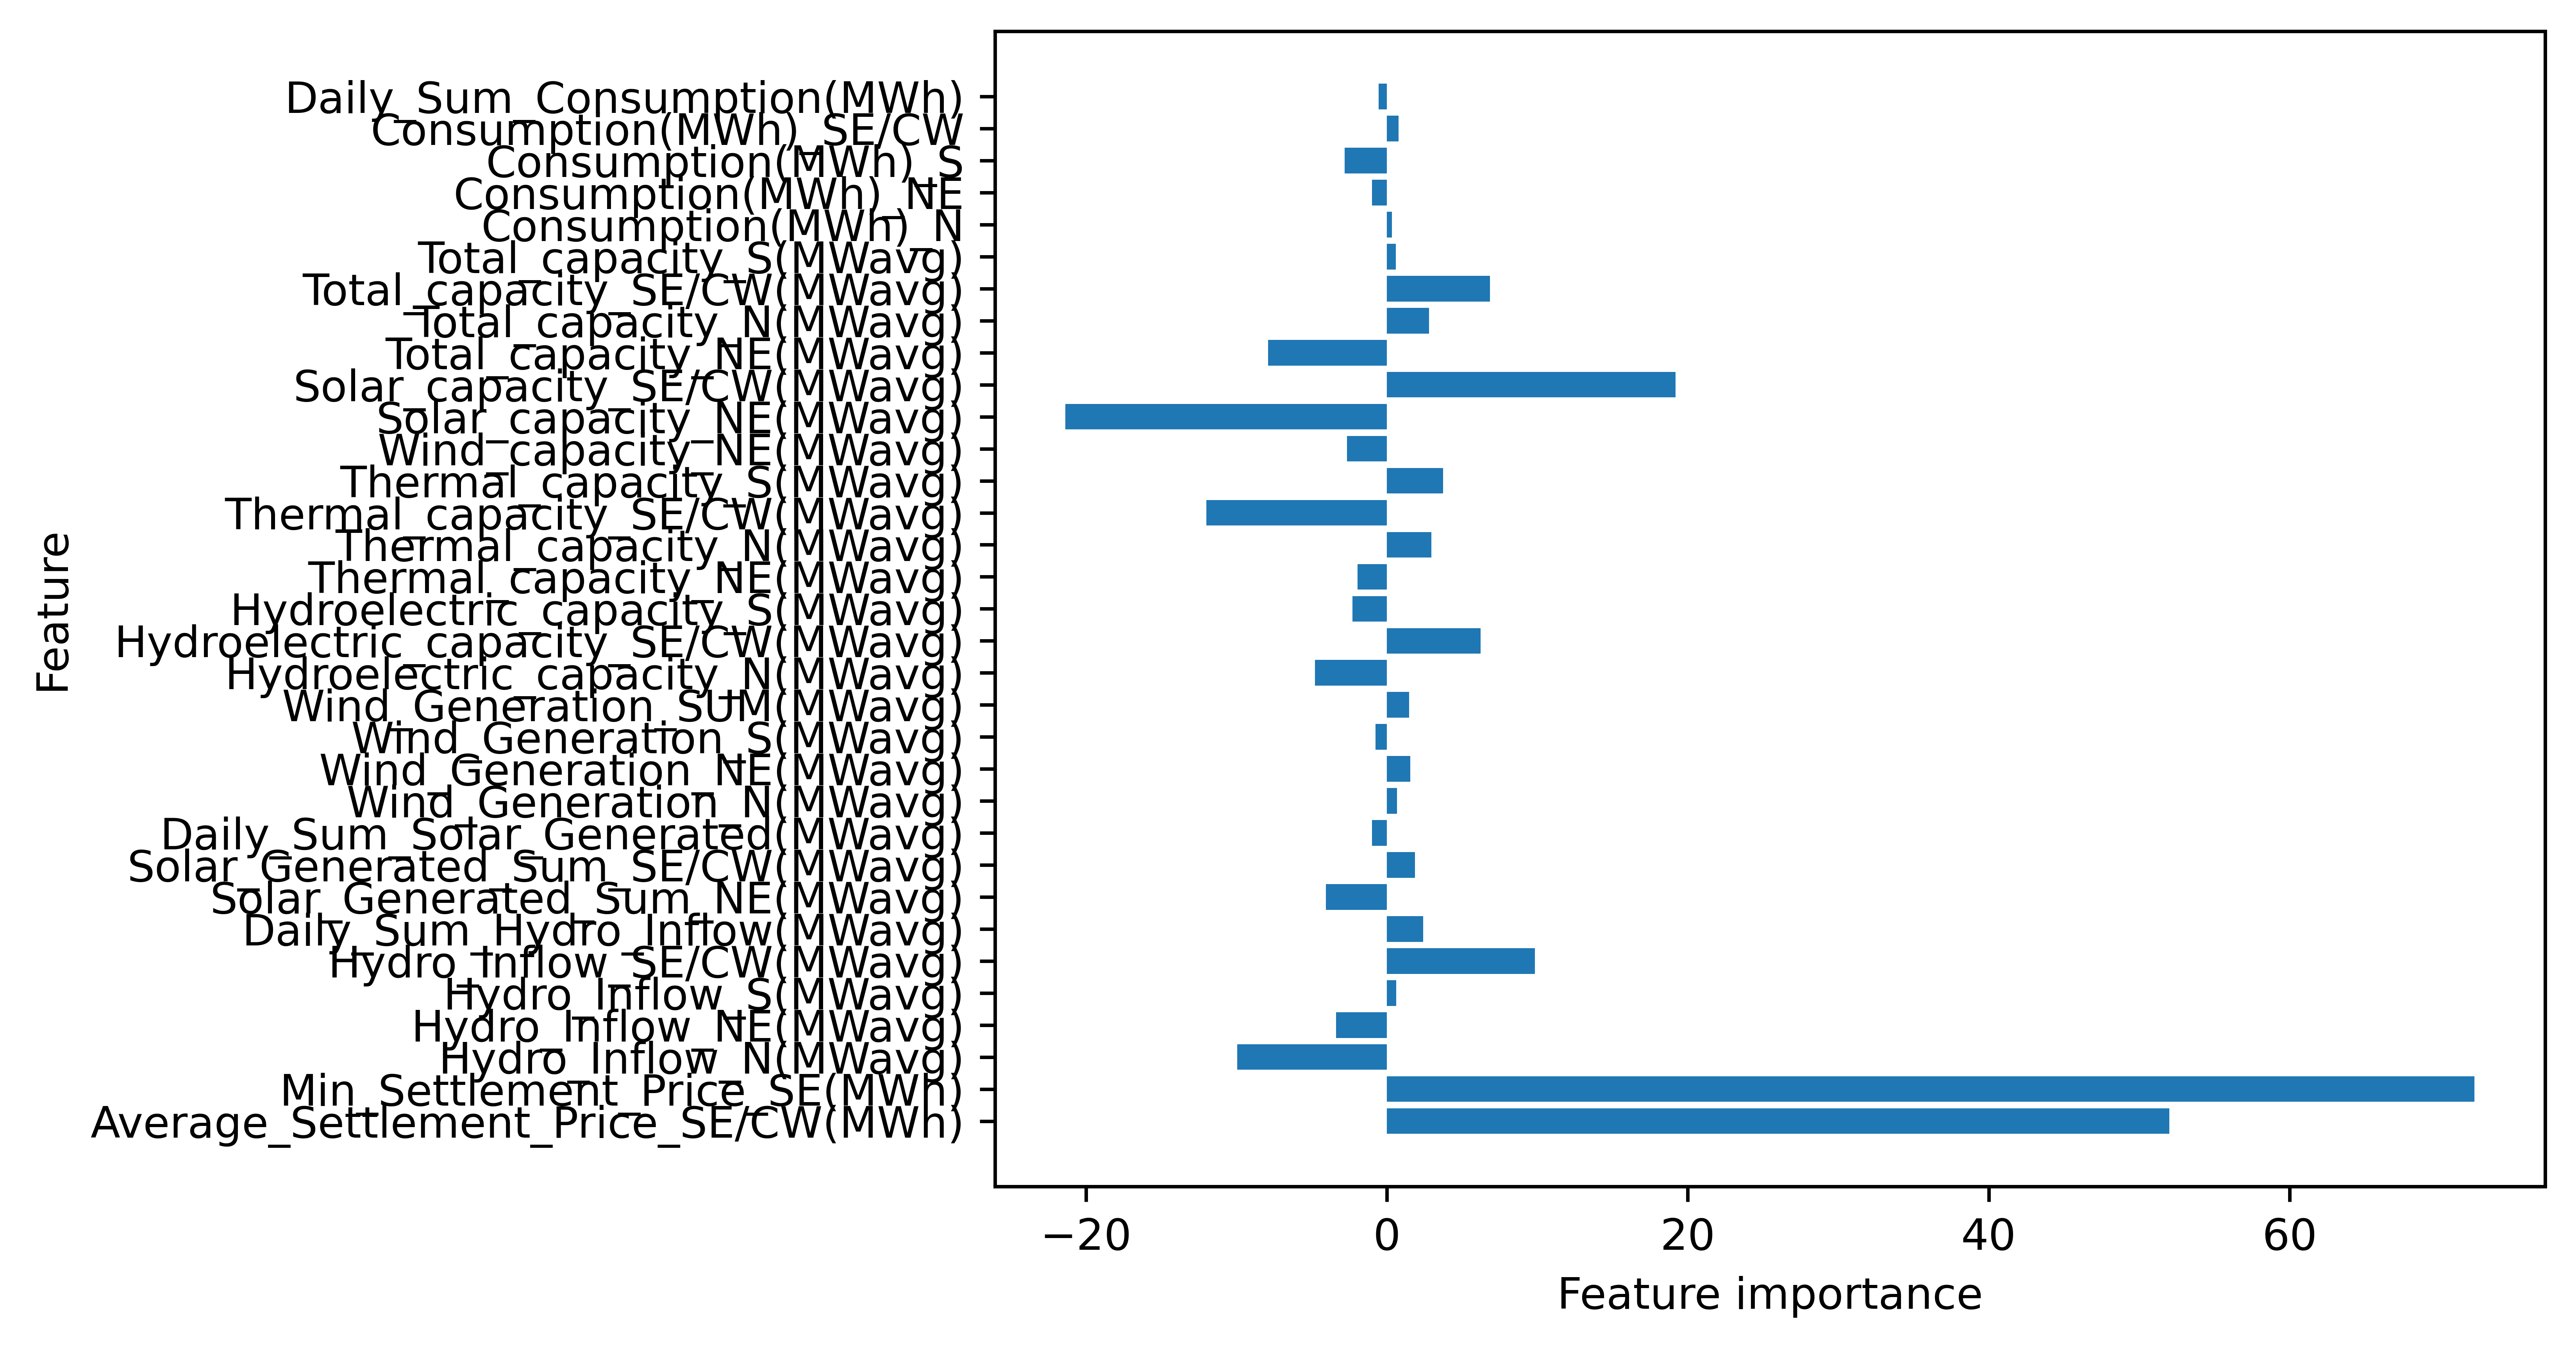

In [7]:
print("Intercept: {}".format(ridge.intercept_))

n_features = len(ridge.coef_)
plt.figure(dpi = 800)
plt.barh(range(n_features), ridge.coef_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")